In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Getting the Dataset

In [3]:
column_names = ["user_id","item_id","rating","timestamp"]

In [4]:
df = pd.read_csv("D:/Downloads/archive/ratings.dat",sep="::",names=column_names)
df

,user_id,item_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
df.shape

(1000209, 4)

### Checking the number of different users 

In [6]:
df["user_id"].nunique()

6040

### Checking the number of different movies

In [7]:
df["item_id"].nunique()

3706

In [8]:
title = ["item_id","movie_title","genre"]
movies = pd.read_csv(r"D:/Downloads/archive/movies.dat",sep="::",names=title,encoding='latin1')
movies

,item_id,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [9]:
df = pd.merge(df,movies,on="item_id")
df.head()

,user_id,item_id,rating,timestamp,movie_title,genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [10]:
df = df.drop(columns="timestamp")

# Exploratory Data Analysis 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [12]:
df.groupby('movie_title').mean()['rating'].sort_values(ascending=False)

movie_title
Ulysses (Ulisse) (1954)                                       5.0
Lured (1947)                                                  5.0
Follow the Bitch (1998)                                       5.0
Bittersweet Motel (2000)                                      5.0
Song of Freedom (1936)                                        5.0
                                                             ... 
Fantastic Night, The (La Nuit Fantastique) (1949)             1.0
Cheetah (1989)                                                1.0
Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)    1.0
Mutters Courage (1995)                                        1.0
Windows (1980)                                                1.0
Name: rating, Length: 3706, dtype: float64

In [13]:
df.groupby('movie_title').count()['rating']

movie_title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Name: rating, Length: 3706, dtype: int64

In [14]:
df.groupby('movie_title').count()['rating'].sort_values(ascending=False)

movie_title
American Beauty (1999)                                       3428
Star Wars: Episode IV - A New Hope (1977)                    2991
Star Wars: Episode V - The Empire Strikes Back (1980)        2990
Star Wars: Episode VI - Return of the Jedi (1983)            2883
Jurassic Park (1993)                                         2672
                                                             ... 
Target (1995)                                                   1
I Don't Want to Talk About It (De eso no se habla) (1993)       1
An Unforgettable Summer (1994)                                  1
Never Met Picasso (1996)                                        1
Full Speed (1996)                                               1
Name: rating, Length: 3706, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('movie_title').mean()['rating'])

In [16]:
ratings['no. of ratings'] = pd.DataFrame(df.groupby('movie_title').count()['rating'])

In [17]:
ratings

,rating,no. of ratings
movie_title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199
...,...,...
"Zed & Two Noughts, A (1985)",3.413793,29
Zero Effect (1998),3.750831,301
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,2


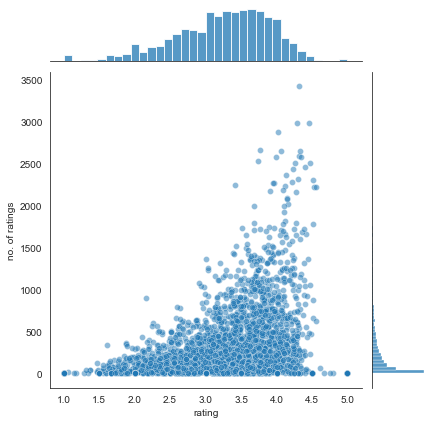

In [18]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings,alpha=0.5)

# Creating Movie Recommendations

In [19]:
df

,user_id,item_id,rating,movie_title,genre
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...
1000204,5949,2198,5,Modulations (1998),Documentary
1000205,5675,2703,3,Broken Vessels (1998),Drama
1000206,5780,2845,1,White Boys (1999),Drama
1000207,5851,3607,5,One Little Indian (1973),Comedy|Drama|Western


In [20]:
moviemat = df.pivot_table(index="user_id",columns="movie_title",values="rating")

In [21]:
moviemat.head()

movie_title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings.sort_values('no. of ratings', ascending=False)

,rating,no. of ratings
movie_title,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
...,...,...
Target (1995),4.000000,1
I Don't Want to Talk About It (De eso no se habla) (1993),4.000000,1
An Unforgettable Summer (1994),3.000000,1


In [23]:
starwars_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']
starwars_user_ratings.head()

user_id
1    4.0
2    NaN
3    5.0
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [24]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [25]:
similar_to_starwars

movie_title
$1,000,000 Duck (1971)                        0.090778
'Night Mother (1986)                          0.104399
'Til There Was You (1997)                     0.024925
'burbs, The (1989)                            0.107898
...And Justice for All (1979)                 0.020055
                                                ...   
Zed & Two Noughts, A (1985)                   0.054670
Zero Effect (1998)                            0.187331
Zero Kelvin (Kjærlighetens kjøtere) (1995)         NaN
Zeus and Roxanne (1997)                      -0.061017
eXistenZ (1999)                               0.055791
Length: 3706, dtype: float64

In [26]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.head()

,Correlation
movie_title,
"$1,000,000 Duck (1971)",0.090778
'Night Mother (1986),0.104399
'Til There Was You (1997),0.024925
"'burbs, The (1989)",0.107898
...And Justice for All (1979),0.020055


In [27]:
corr_starwars.dropna(inplace=True)

In [28]:
corr_starwars

,Correlation
movie_title,
"$1,000,000 Duck (1971)",0.090778
'Night Mother (1986),0.104399
'Til There Was You (1997),0.024925
"'burbs, The (1989)",0.107898
...And Justice for All (1979),0.020055
...,...
Your Friends and Neighbors (1998),-0.001888
"Zed & Two Noughts, A (1985)",0.054670
Zero Effect (1998),0.187331


In [29]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
movie_title,
Those Who Love Me Can Take the Train (Ceux qui m'aiment prendront le train) (1998),1.0
Better Living (1998),1.0
Dangerous Ground (1997),1.0
"Gay Deceivers, The (1969)",1.0
I Got the Hook Up (1998),1.0
...,...
"Living Dead Girl, The (La Morte Vivante) (1982)",-1.0
Beefcake (1999),-1.0
"Devil Rides Out, The (1968)",-1.0


In [30]:
ratings

,rating,no. of ratings
movie_title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199
...,...,...
"Zed & Two Noughts, A (1985)",3.413793,29
Zero Effect (1998),3.750831,301
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000,2


In [31]:
corr_starwars = corr_starwars.join(ratings['no. of ratings'])

In [32]:
corr_starwars[corr_starwars['no. of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,no. of ratings
movie_title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,2991
Star Wars: Episode V - The Empire Strikes Back (1980),0.661552,2990
Star Wars: Episode VI - Return of the Jedi (1983),0.574808,2883
Raiders of the Lost Ark (1981),0.421425,2514
Dracula (1958),0.398710,102
...,...,...
Dirty Work (1998),-0.217421,135
Sleepwalkers (1992),-0.222358,113
Priest (1994),-0.228204,143


# Predict Movies Function

In [33]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['no. of ratings'])
    predictions = corr_movie[corr_movie['no. of ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions

In [34]:
predictions = predict_movies("Zero Effect (1998)")
predictions.head()

,Correlation,no. of ratings
movie_title,,
Zero Effect (1998),1.000000,301
Lifeboat (1944),0.813946,213
Love! Valour! Compassion! (1997),0.755725,103
Gilda (1946),0.741620,107
Giant (1956),0.739019,130


In [35]:
predictions = predict_movies("American Beauty (1999)")
predictions.head()

,Correlation,no. of ratings
movie_title,,
American Beauty (1999),1.000000,3428
All the King's Men (1949),0.449530,119
"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",0.418774,117
Girlfight (2000),0.407817,127
Winnie the Pooh and the Blustery Day (1968),0.400987,221


In [36]:
predictions = predict_movies("Winnie the Pooh and the Blustery Day (1968)")
predictions.head()

,Correlation,no. of ratings
movie_title,,
Winnie the Pooh and the Blustery Day (1968),1.000000,221
"Suddenly, Last Summer (1959)",0.911616,102
Angela's Ashes (1999),0.880705,225
Out of the Past (1947),0.879049,106
Walkabout (1971),0.856876,136
